In [3]:
!pip install pycocotools --quiet
!git clone https://github.com/pytorch/vision.git
!git checkout v0.3.0

!cp vision/references/detection/utils.py ./
!cp vision/references/detection/transforms.py ./
!cp vision/references/detection/coco_eval.py ./
!cp vision/references/detection/engine.py ./
!cp vision/references/detection/coco_utils.py ./

Cloning into 'vision'...
remote: Enumerating objects: 625906, done.
remote: Counting objects: 100% (1636/1636), done.
remote: Compressing objects: 100% (800/800), done.
remote: Total 625906 (delta 1517), reused 871 (delta 832), pack-reused 624270 (from 4)
Receiving objects: 100% (625906/625906), 1.16 GiB | 42.87 MiB/s, done.
Resolving deltas: 100% (585474/585474), done.
fatal: Not a git repository (or any parent up to mount point /beegfs/data)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [1]:
# basic python libraries
import os
import random
import numpy as np
import pandas as pd
# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# openCV
import cv2

# xml library for parsing xml files
from xml.etree import ElementTree as et

# matplotlib for visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# torchvision libraries
import torch
import torchvision
from torchvision import transforms as torchtrans
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# helper libraries
from engine import train_one_epoch, evaluate
# import utils
# import transforms as T

# for image augmentations
# import albumentations as A

# from albumentations.pytorch.transforms import ToTensorV2

from my_utils import FruitImagesDataset,train_model,get_object_detection_model

# defining the train and test directory
train_dir = '/work/shared/ngmm/scripts/Beyza_Zayim/datachon/data/train'
test_dir = '/work/shared/ngmm/scripts/Beyza_Zayim/datachon/data/test'

# init dataset train and test
dataset_train = FruitImagesDataset(train_dir, 224, 224)
dataset_test = FruitImagesDataset(test_dir, 224, 224)

# check dataset
print("DATASET: Fruit-Images-Dataset",
      "\n",
      "\nTRAIN:",
      "\nLenght: {} images".format(dataset_train.__len__()),
      "\n"
      "\nTEST:",
      
      "\nLenght: {} images".format(dataset_test.__len__()))

DATASET: Fruit-Images-Dataset 
 
TRAIN: 
Lenght: 50 images 

TEST: 
Lenght: 10 images


In [2]:
def collate_fn(batch):
    return tuple(zip(*batch))

# split the dataset in train and validation set
torch.manual_seed(1)
indices = torch.randperm(len(dataset_train)).tolist()

# Original full dataset
full_dataset = dataset_train

# Train/validation split
val_split = 0.2
val_size = int(len(full_dataset) * val_split)
train_dataset = torch.utils.data.Subset(full_dataset, indices[:-val_size])
val_dataset = torch.utils.data.Subset(full_dataset, indices[-val_size:])


# define train data loaders
dataloader_train = torch.utils.data.DataLoader(train_dataset,
                                               batch_size=10,
                                               shuffle=True,
                                               num_workers=4,
                                               collate_fn=collate_fn)

# define validation data loaders
dataloader_val = torch.utils.data.DataLoader(val_dataset,
                                             batch_size=10,
                                             shuffle=False,
                                             num_workers=4,
                                             collate_fn=collate_fn)

# define test data loaders
dataloader_test = torch.utils.data.DataLoader(dataset_test,
                                              batch_size=10,
                                              shuffle=False,
                                              num_workers=4,
                                              collate_fn=collate_fn)

print("DATASET SPLIT:\n",
      "\nTRAIN: {}".format(len(train_dataset)),
      "\nVALIDATION: {}".format(len(val_dataset)),
      "\nTEST: {}".format(len(dataset_test)))


# to train on gpu if selected.
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


DATASET SPLIT:
 
TRAIN: 40 
VALIDATION: 10 
TEST: 10


In [3]:
num_classes = 2
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# get the object detection model
model = get_object_detection_model(num_classes)

# move model to the right device
model.to(device)

# define optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params,
                            lr=0.005,
                            momentum=0.9,
                            weight_decay=0.0005)

# define learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)




train_accuracies = []
val_accuracies = []





# Example usage:
save_path = "/work/shared/ngmm/scripts/Beyza_Zayim/datachon/output/models"  # Change this to your desired path


# Train the model
train_model(model, dataloader_train, dataloader_val, optimizer, lr_scheduler, device, num_epochs=1, save_path=save_path)


[INFO] Starting epoch 1/1
[INFO] 1 box(es) found for image: Image_20240528_095210767.jpg | Labels: [2]
[INFO] 6 box(es) found for image: Image_20240528_093522933.jpg | Labels: [2, 1, 2, 2, 2, 2]
[INFO] 6 box(es) found for image: Image_20240528_111243905.jpg | Labels: [2, 2, 2, 2, 2, 2][INFO] 7 box(es) found for image: Image_20240528_112105998.jpg | Labels: [2, 2, 2, 2, 2, 1, 2]

[INFO] 7 box(es) found for image: Image_20240528_111156078.jpg | Labels: [1, 2, 2, 2, 2, 2, 2]
[INFO] 2 box(es) found for image: Image_20240528_111521894.jpg | Labels: [2, 2]
[INFO] 2 box(es) found for image: Image_20240528_112025096.jpg | Labels: [2, 2]
[INFO] 6 box(es) found for image: Image_20240528_095853302.jpg | Labels: [2, 2, 2, 2, 2, 2]
[INFO] 4 box(es) found for image: Image_20240528_111052514.jpg | Labels: [2, 2, 2, 2]
[INFO] 4 box(es) found for image: Image_20240528_110940066.jpg | Labels: [1, 2, 2, 2]
[INFO] 27 box(es) found for image: Image_20240528_093202878.jpg | Labels: [2, 2, 2, 2, 2, 1, 1, 1, 

RuntimeError: cuDNN error: CUDNN_STATUS_NOT_SUPPORTED_ARCH_MISMATCH

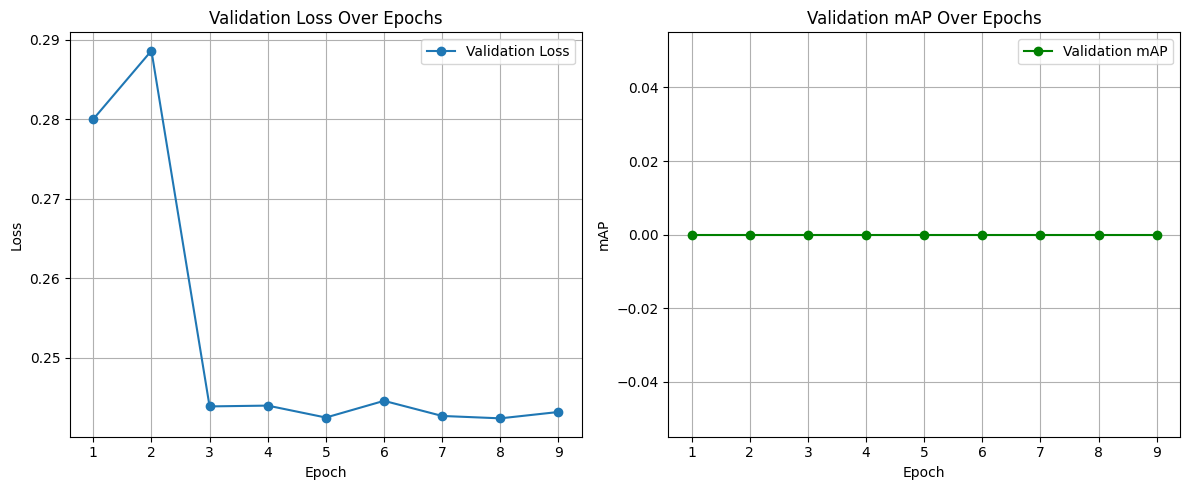

In [2]:
import re
import matplotlib.pyplot as plt

log_path = "/work/shared/ngmm/scripts/Beyza_Zayim/datachon/logger/sub.sh.o4632798"

# Lists to store parsed values
epochs = []
val_losses = []
val_maps = []

# Regex pattern to extract the data
pattern = re.compile(r"Epoch (\d+) Complete \| Val Loss: ([\d.]+) \| Val mAP: ([\d.]+)")

with open(log_path, 'r') as file:
    for line in file:
        match = pattern.search(line)
        if match:
            epoch = int(match.group(1))
            loss = float(match.group(2))
            map_val = float(match.group(3))

            epochs.append(epoch)
            val_losses.append(loss)
            val_maps.append(map_val)

# Plotting
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, val_losses, marker='o', label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Validation Loss Over Epochs")
plt.grid(True)
plt.legend()

# mAP plot
plt.subplot(1, 2, 2)
plt.plot(epochs, val_maps, marker='o', color='green', label='Validation mAP')
plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.title("Validation mAP Over Epochs")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [3]:
import json
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchvision.transforms.functional import to_pil_image

def plot_predictions(image_tensor, boxes, labels, scores, class_names, score_threshold=0.5):
    image = to_pil_image(image_tensor.cpu())
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image)

    for box, label, score in zip(boxes, labels, scores):
        if score < score_threshold:
            continue
        xmin, ymin, xmax, ymax = box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=2, edgecolor='lime', facecolor='none')
        ax.add_patch(rect)
        label_text = f"{class_names[label]}: {score:.2f}"
        ax.text(xmin, ymin - 5, label_text, color='white', backgroundcolor='green', fontsize=10)

    plt.axis("off")
    plt.show()

def visualize_saved_predictions(predictions_path, dataset, class_names, score_threshold=0.5, max_images=5):
    with open(predictions_path, "r") as f:
        predictions = json.load(f)

    for i, result in enumerate(predictions[:max_images]):
        image_tensor, _ = dataset[i]  # Only if dataset returns (image, target)
        plot_predictions(
            image_tensor=image_tensor,
            boxes=result["pred_boxes"],
            labels=result["pred_labels"],
            scores=result["pred_scores"],
            class_names=class_names,
            score_threshold=score_threshold
        )


[INFO] 0 box(es) found for image: Image_20240730_153838577.jpg


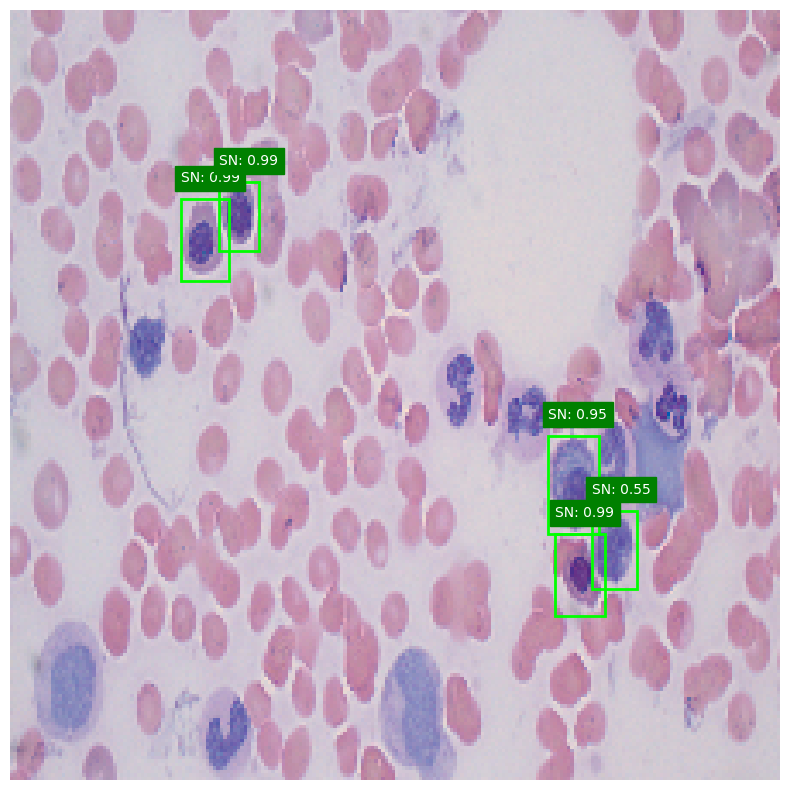

In [12]:
from my_utils import FruitImagesDataset,train_model,get_object_detection_model,convert_voc_to_coco,test_model

test_dir = '/work/shared/ngmm/scripts/Beyza_Zayim/datachon/data/test'

# Load dataset
dataset_test = FruitImagesDataset(test_dir, 224, 224)


# Visualize predictions using the dataset, not the dataloader
visualize_saved_predictions(
    predictions_path="/work/shared/ngmm/scripts/Beyza_Zayim/datachon/output/test_results.json",
    dataset=dataset_test,  # 👈 Correct: use dataset here
    class_names=['__background__', 'SC', 'SN'],
    score_threshold=0.5,
    max_images=10
)


In [7]:
import xml.etree.ElementTree as ET

def load_ground_truth_boxes(xml_path, original_w, original_h, target_w, target_h, class_to_idx):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    boxes = []
    labels = []

    for obj in root.findall('object'):
        label_name = obj.find('name').text
        if label_name not in class_to_idx:
            continue
        label = class_to_idx[label_name]

        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

        # Rescale to match the resized image
        xmin = (xmin / original_w) * target_w
        xmax = (xmax / original_w) * target_w
        ymin = (ymin / original_h) * target_h
        ymax = (ymax / original_h) * target_h

        boxes.append([xmin, ymin, xmax, ymax])
        labels.append(label)

    return boxes, labels


In [8]:
def plot_predictions_with_gt(image_tensor, pred_boxes, pred_labels, pred_scores,
                             gt_boxes, gt_labels, class_names, score_threshold=0.5):
    image = to_pil_image(image_tensor.cpu())
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image)

    # Plot predicted boxes (Green)
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < score_threshold:
            continue
        xmin, ymin, xmax, ymax = box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=2, edgecolor='lime', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin - 5, f"{class_names[label]}: {score:.2f}",
                color='white', backgroundcolor='green', fontsize=10)

    # Plot ground truth boxes (Red)
    for box, label in zip(gt_boxes, gt_labels):
        xmin, ymin, xmax, ymax = box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymax + 5, f"{class_names[label]} (GT)",
                color='white', backgroundcolor='red', fontsize=10)

    plt.axis("off")
    plt.show()


[INFO] 3 box(es) found for image: Image_20240730_153838577.jpg


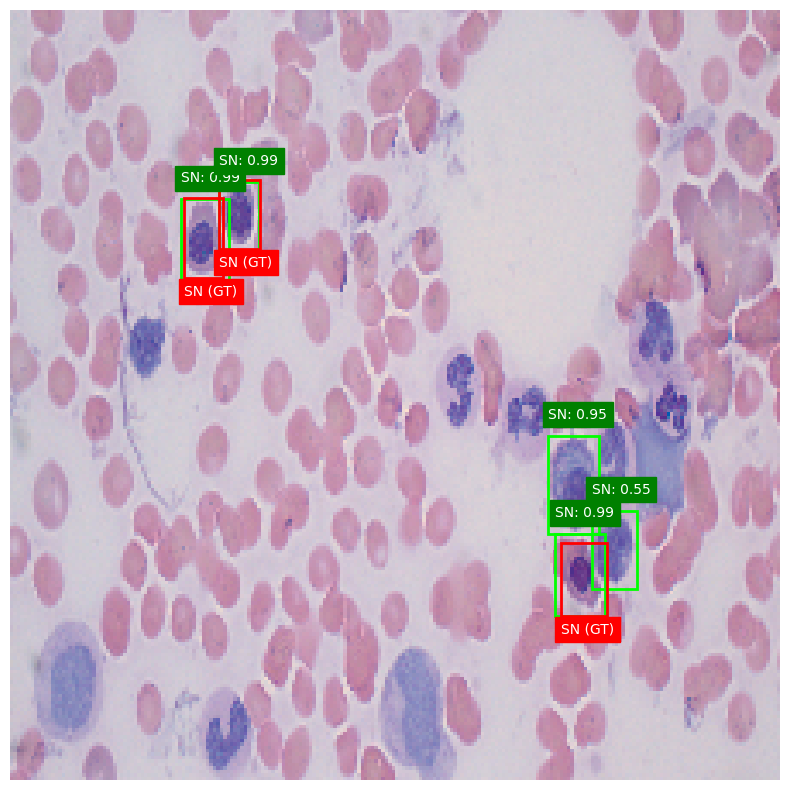

In [11]:
# basic python libraries
import os
import random
import numpy as np
import pandas as pd
import cv2
image_idx = 0
image_tensor, _ = dataset_test[image_idx]
img_name = dataset_test.imgs[image_idx]
image_path = os.path.join(test_dir, img_name)
xml_path = image_path.replace(".jpg", ".jpg.xml")

# Get original image size
original_img = cv2.imread(image_path)
original_h, original_w = original_img.shape[:2]

# Load ground truth
gt_boxes, gt_labels = load_ground_truth_boxes(
    xml_path, original_w, original_h,
    target_w=224, target_h=224,
    class_to_idx=dataset_test.class_to_idx
)

# Load predictions (assumes loaded from JSON already)
with open("/work/shared/ngmm/scripts/Beyza_Zayim/datachon/output/test_results.json") as f:
    preds = json.load(f)
pred = preds[image_idx]

# Plot everything
plot_predictions_with_gt(
    image_tensor=image_tensor,
    pred_boxes=pred["pred_boxes"],
    pred_labels=pred["pred_labels"],
    pred_scores=pred["pred_scores"],
    gt_boxes=gt_boxes,
    gt_labels=gt_labels,
    class_names=dataset_test.classes
)
